# Bayesian Inference Example
## Exercise 1: Bayesian Inference, in 3 Easy Steps


## Advanced topics on machine learning
 UNIVERSIDAD TECNOLÓGICA DE PEREIRA
 
Mauricio A. Álvarez PhD

TA: Cristian D. Guarnizo PhD and Hernan F. García PhD (c)

**Step 1:** Specify a probability model
As was noted above, Bayesian statistics involves using probability models to solve problems. So, the first task is to completely specify the model in terms of probability distributions. This includes everything: unknown parameters, data, covariates, missing data, predictions. All must be assigned some probability density.

This step involves making choices.

* what is the form of the sampling distribution of the data?
* what form best describes our uncertainty in the unknown parameters?

**Discrete Random Variables**
$$X = \{0,1\}$$$$Y = \{\ldots,-2,-1,0,1,2,\ldots\}$$
**Probability Mass Function**

For discrete $X$,

$$Pr(X=x) = f(x|\theta)$$


> > > ![texto alternativo](https://camo.githubusercontent.com/cbe3d7152c098000ca689e2bd16a690f0a7eaf69/687474703a2f2f75706c6f61642e77696b696d656469612e6f72672f77696b6970656469612f636f6d6d6f6e732f312f31362f506f6973736f6e5f706d662e737667)



**e.g. Poisson distribution**

The Poisson distribution models unbounded counts:

$$Pr(X=x)=\frac{e^{-\lambda}\lambda^x}{x!}$$

* $X=\{0,1,2,\ldots\}$
* $\lambda >0$
$$E(X) = \text{Var}(X) = \lambda$$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

sns.set_context('notebook')

RANDOM_SEED = 20090425
from pymc3 import Poisson

x = Poisson.dist(mu=1)
samples = x.random(size=10000)

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
D:\ProgramData\Anaconda3\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


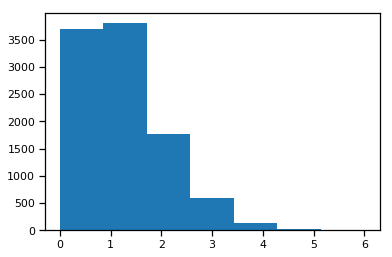

In [2]:
samples.mean()

plt.hist(samples, bins=len(set(samples)));


Continuous Random Variables
$$X \in [0,1]$$$$Y \in (-\infty, \infty)$$
Probability Density Function:

For continuous $X$,

$$Pr(x \le X \le x + dx) = f(x|\theta)dx \, \text{ as } \, dx \rightarrow 0$$

> > > ![texto alternativo](https://camo.githubusercontent.com/f8f12da6407a7d07a9e6feed07495378276eb44f/68747470733a2f2f75706c6f61642e77696b696d656469612e6f72672f77696b6970656469612f636f6d6d6f6e732f372f37342f4e6f726d616c5f446973747269627574696f6e5f5044462e737667)



**e.g. normal distribution**

$$f(x) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left[-\frac{(x-\mu)^2}{2\sigma^2}\right]$$
* $X \in \mathbf{R}$
* $\mu \in \mathbf{R}$
* $\sigma > 0$
$$\begin{align}E(X) &amp;= \mu \cr
\text{Var}(X) &amp;= \sigma^2 \end{align}$$

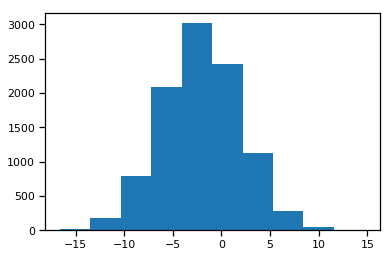

In [3]:
from pymc3 import Normal

y = Normal.dist(mu=-2, sd=4)
samples = y.random(size=10000)
samples.mean()
samples.std()
plt.hist(samples);

### Step 2:  Calculate a posterior distribution 

The mathematical form $p(\theta | y)$ that we associated with the Bayesian approach is referred to as a posterior distribution.



* Why posterior? Because it tells us what we know about the unknown $\theta$ after having observed $y$.

This posterior distribution is formulated as a function of the probability model that was specified in Step 1. Usually, we can write it down but we cannot calculate it analytically. In fact, the difficulty inherent in calculating the posterior distribution for most models of interest is perhaps the major contributing factor for the lack of widespread adoption of Bayesian methods for data analysis. Various strategies for doing so comprise this tutorial.

But, once the posterior distribution is calculated, you get a lot for free:

* point estimates
* credible intervals
* quantiles
* predictions

### Step 3: Check your model
Though frequently ignored in practice, it is critical that the model and its outputs be assessed before using the outputs for inference. Models are specified based on assumptions that are largely unverifiable, so the least we can do is examine the output in detail, relative to the specified model and the data that were used to fit the model.

Specifically, we must ask:

does the model fit data?
* are the conclusions reasonable?
* are the outputs sensitive to changes in model structure?


## Estimation for one group
Before we compare two groups using Bayesian analysis, let's start with an even simpler scenario: statistical inference for one group.

For this we will use Gelman et al.'s (2007) radon dataset. In this dataset the amount of the radioactive gas radon has been measured among different households in all counties of several states. Radon gas is known to be the highest cause of lung cancer in non-smokers. It is believed to be more strongly present in households containing a basement and to differ in amount present among types of soil.

let's import the dataset

In [4]:
radon = pd.read_csv('radon.csv', index_col=0)
radon.head()

,idnum,state,state2,stfips,zip,region,typebldg,floor,room,basement,...,pcterr,adjwt,dupflag,zipflag,cntyfips,county,fips,Uppm,county_code,log_radon
0,5081.0,MN,MN,27.0,55735,5.0,1.0,1.0,3.0,N,...,9.7,1146.499190,1.0,0.0,1.0,AITKIN,27001.0,0.502054,0,0.832909
1,5082.0,MN,MN,27.0,55748,5.0,1.0,0.0,4.0,Y,...,14.5,471.366223,0.0,0.0,1.0,AITKIN,27001.0,0.502054,0,0.832909
2,5083.0,MN,MN,27.0,55748,5.0,1.0,0.0,4.0,Y,...,9.6,433.316718,0.0,0.0,1.0,AITKIN,27001.0,0.502054,0,1.098612
3,5084.0,MN,MN,27.0,56469,5.0,1.0,0.0,4.0,Y,...,24.3,461.623670,0.0,0.0,1.0,AITKIN,27001.0,0.502054,0,0.095310
4,5085.0,MN,MN,27.0,55011,3.0,1.0,0.0,4.0,Y,...,13.8,433.316718,0.0,0.0,3.0,ANOKA,27003.0,0.428565,1,1.163151


Let's focus on the (log) radon levels measured in a single county (Hennepin).

Suppose we are interested in:

* whether the mean log-radon value is greater than 4 pCi/L in Hennepin county
* the probability that any randomly-chosen household in Hennepin county has a reading of greater than 4

D:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(105,)

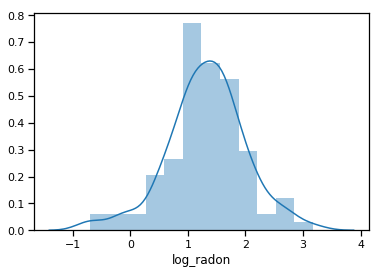

In [5]:
hennepin_radon = radon.query('county=="HENNEPIN"').log_radon
sns.distplot(hennepin_radon)
hennepin_radon.shape

## The model
Recall that the first step in Bayesian inference is specifying a full probability model for the problem.

This consists of:

* a likelihood function(s) for the observations
* priors for all unknown quantities

The measurements look approximately normal, so let's start by assuming a normal distribution as the sampling distribution (likelihood) for the data.

$$y_i \sim N(\mu, \sigma^2)$$
(don't worry, we can evaluate this assumption)

This implies that we have 2 unknowns in the model; the mean and standard deviation of the distribution.

## Prior choice
How do we choose distributions to use as priors for these parameters?

There are several considerations:

* discrete vs continuous values
* the support of the variable
* the available prior information
While there may likely be prior information about the distribution of radon values, we will assume no prior knowledge, and specify a diffuse prior for each parameter.

Since the mean can take any real value (since it is on the log scale), we will use another normal distribution here, and specify a large variance to allow the possibility of very large or very small values:

$$\mu \sim N(0, 10^2)$$
For the standard deviation, we know that the true value must be positive (no negative variances!). I will choose a uniform prior bounded from below at zero and from above at a value that is sure to be higher than any plausible value the true standard deviation (on the log scale) could take.

$$\sigma \sim U(0, 10)$$
We can encode these in a Python model, using the PyMC3 package, as follows:

In [6]:
from pymc3 import Model, Uniform

with Model() as radon_model:
    
    μ = Normal('μ', mu=0, sd=10)
    σ = Uniform('σ', 0, 10)

**Software**
Today there is an array of software choices for Bayesians, including both open source software (e.g., Stan, PyMC, JAGS, emcee) and commercial (e.g., SAS, Stata). These examples can be replicated in any of these environments.



All that remains is to add the likelihood, which takes $\mu$ and $\sigma$ as parameters, and the log-radon values as the set of observations:

In [7]:
with radon_model:
    
    y = Normal('y', mu=μ, sd=σ, observed=hennepin_radon)

Now, we will fit the model using a numerical approach called **variational inference**. This will estimate the posterior distribution using an optimized approximation, and then draw samples from it.

In [8]:
from pymc3 import fit

with radon_model:

    samples = fit(random_seed=RANDOM_SEED).sample(1000)

Average Loss = 136.48: 100%|█████████████████████████████████████████████████████| 10000/10000 [03:01<00:00, 54.96it/s]
Finished [100%]: Average Loss = 136.37


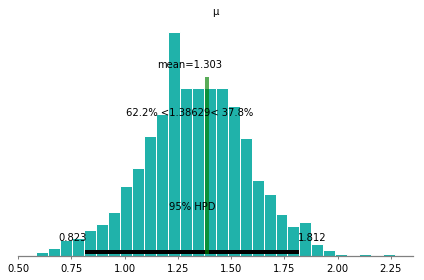

In [9]:
#!pip install arviz
#import arviz as az
from pymc3 import plot_posterior
plot_posterior(samples, varnames=['μ'], ref_val=np.log(4), color='LightSeaGreen');

The plot shows the posterior distribution of $\mu$, along with an estimate of the 95% posterior credible interval.

The output

83.1% < 1.38629 < 16.9%%

informs us that the probability of $\mu$ being less than $\log(4)$ is 83.1%% and the corresponding probability of being greater than $\log(4)$ is 16.9%.

The posterior probability that the mean level of household radon in Henneprin County is greater than 4 pCi/L is 0.17.

Prediction
What is the probability that a given household has a log-radon measurement larger than one? To answer this, we make use of the posterior predictive distribution.

$$p(z |y) = \int_{\theta} p(z |\theta) p(\theta | y) d\theta$$
where here $z$ is the predicted value and y is the data used to fit the model.

We can estimate this from the posterior samples of the parameters in the model.

In [10]:
mus = samples['μ']
sigmas = samples['σ']
radon_samples = Normal.dist(mus, sigmas).random()
(radon_samples > np.log(4)).mean()

0.453

The posterior probability that a randomly-selected household in Henneprin County contains radon levels in excess of 4 pCi/L is 0.48.

## Model checking
But, how do we know this model is any good?

Its important to check the fit of the model, to see if its assumptions are reasonable. One way to do this is to perform posterior predictive checks. This involves generating simulated data using the model that you built, and comparing that data to the observed data.

One can choose a particular statistic to compare, such as tail probabilities or quartiles, but here it is useful to compare them graphically.

We already have these simulations from the previous exercise!

D:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


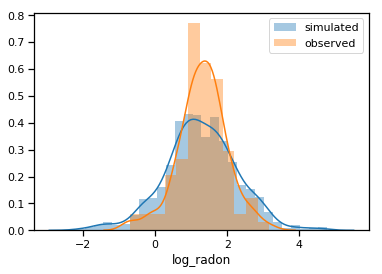

In [11]:
sns.distplot(radon_samples, label='simulated')
sns.distplot(hennepin_radon, label='observed')
plt.legend()

## Prior sensitivity
Its also important to check the sensitivity of your choice of priors to the resulting inference.

Here is the same model, but with drastically different (though still uninformative) priors specified:

In [12]:
from pymc3 import Flat, HalfCauchy

with Model() as prior_sensitivity:
    
    μ = Flat('μ')
    σ = HalfCauchy('σ', 5)
    
    dist = Normal('dist', mu=μ, sd=σ, observed=hennepin_radon)
    
    sensitivity_samples = fit(random_seed=RANDOM_SEED).sample(1000)

Average Loss = 123.98: 100%|█████████████████████████████████████████████████████| 10000/10000 [02:58<00:00, 55.90it/s]
Finished [100%]: Average Loss = 123.94


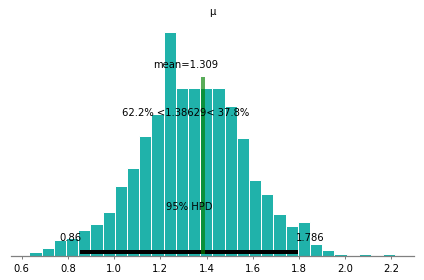

In [13]:
plot_posterior(sensitivity_samples, varnames=['μ'], ref_val=np.log(4), color='LightSeaGreen');

Here is the original model for comparison:

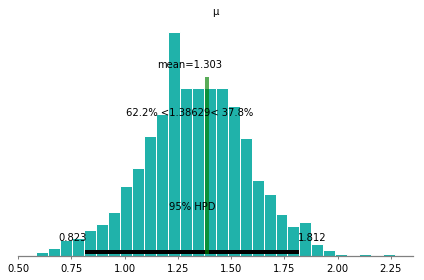

In [14]:
plot_posterior(samples, varnames=['μ'], ref_val=np.log(4), color='LightSeaGreen');